# YOUTUBE comments spam Classifier overview

This whole project is about classifying as SPAM or NOTSPAM of the comments made for the top trending videos in youtube. 


Source: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection#

This dataset consists of five CSV files along with other files.

This corpus has been collected using the YouTube Data API v3.

# Project Overview

Defending SPAM is one of the major goal of the tech giants.Youtube takes major measures to do so. This is the project 11 in the TERM two of my nanodegree program and it provides me an 
opportunity to use machine learning techniques to solve a problem with my skils gained.


# Problem statement

The Main objective of the problem is to classify a corpus of youtube comments collected on five videos overtime and use machine learning
techniques to classify them as SPAM or NOTSPAM comments.

In [1]:
# importing the necessary modules 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing all the csv files from the loacl machine

A = pd.read_csv('Youtube01-Psy.csv')
B = pd.read_csv('Youtube02-KatyPerry.csv')
C = pd.read_csv('Youtube03-LMFAO.csv')
D = pd.read_csv('Youtube04-Eminem.csv')
E = pd.read_csv('Youtube05-Shakira.csv')

In [3]:
#checking if the data is imported properly

print(A.head(5))
print(B.tail(5))

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  
                                COMMENT_ID               AUTHO

As we can see there are multiple datasets in the given problem, first we need to combine all the datasets to be able to work on them.

In python we can combine with the "concate" function.

In [4]:
#combining all the datasets into a dataframe 
train_df = pd.concat([A,B,C,D,E])
print(train_df.head(3))

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   

   CLASS  
0      1  
1      1  
2      1  


In [5]:
#checking the length of the df

len(train_df)

1956

In [6]:
# we are cecking the total number of comments for the df which are both spam and notspam

len(train_df.query('CLASS == 1'))


1005

In [7]:
len(train_df.query('CLASS == 0'))

951

 # observations 
 
    We see that there are around 2000 comments in Toal

# Data cleaning


The first step involves dropping the unnecessary columns from the dataset

In [8]:
cln_df = train_df.drop(['COMMENT_ID','AUTHOR','DATE'], axis=1)

In [9]:
cln_df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [10]:
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
CONTENT    1956 non-null object
CLASS      1956 non-null int64
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [11]:
# defining features and labels for the dataset

X = cln_df.CONTENT
y = cln_df.CLASS

#checking the shape of the dataset
print(X.shape)
print(y.shape)

(1956,)
(1956,)


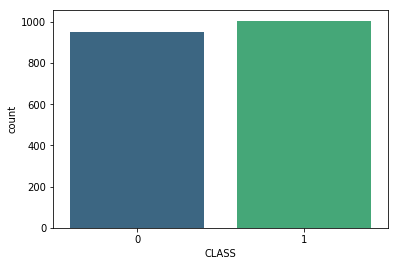

In [12]:
# we shall see some visualization for the better idea of the comments

# Plotting the number of class counts
sns.countplot(x='CLASS',data=cln_df,palette='viridis')

 # Observation
 
From the above histogram,we infer that there are more number of comments of the class 1 than the number of comments in the class 0

  Now we shall split the data into training and Testing set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
#checking the split 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1467,)
(489,)
(1467,)
(489,)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [16]:
# performing fit and transform simultaneously

vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer.fit_transform(X_train)
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(X_train)

In [19]:
x_train_counts.shape

(1467, 3535)

# Computing Frequency


In orer to compute the frequency of the words we are using the method TF and TF-IDF

TF stands for Term Frequency 

TF-IDF stands for Term Frequency Inverse Document Frequency

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(1467, 3535)

In [21]:
x_test_counts = count_vect.transform(X_test)
x_test_counts

<489x3535 sparse matrix of type '<class 'numpy.int64'>'
	with 2981 stored elements in Compressed Sparse Row format>

In [22]:
x_test_tfidf = tranformer.transform(x_test_counts)
x_test_tfidf

<489x3535 sparse matrix of type '<class 'numpy.float64'>'
	with 2981 stored elements in Compressed Sparse Row format>

In [23]:
# In this case we are using the Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions = model.predict(x_test_tfidf)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [26]:
confusion_matrix(y_test,predictions)

array([[203,  43],
       [ 12, 231]], dtype=int64)

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       246
           1       0.84      0.95      0.89       243

   micro avg       0.89      0.89      0.89       489
   macro avg       0.89      0.89      0.89       489
weighted avg       0.89      0.89      0.89       489



In [28]:
# selecting and applying the model 
#logistic Regression in this case 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)

C:\Users\sadhu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
new_predictions = model.predict(x_test_tfidf)

Model predction is done and now we shall check the accuracy score for the above model 

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
confusion_matrix(y_test,new_predictions)

array([[234,  12],
       [ 15, 228]], dtype=int64)

In [32]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       246
           1       0.95      0.94      0.94       243

   micro avg       0.94      0.94      0.94       489
   macro avg       0.94      0.94      0.94       489
weighted avg       0.94      0.94      0.94       489



# Observations 


After running both the models it is observed that LogisticRegression model has better F1-Score when compared to the Multinomial Naive Bayes model.

In this case we shall select LogisticRegression for more accrute predections.


# About logistic regression

In this provlem we used the logistic regression to improve the model predections because, Logstic Regression does better predections if there are no outliers.It also performs better when there is no high correlation amoung the predictors. 

# Metric Used 

Here we are using the F1-score as the metric to measure the performance. The more the F1 score the better the model is performing.

# saving the model into pickle file 

In [33]:
import pickle 

In [34]:
#naivebayesML = open("YtbSpam_model.pkl","wb")
randomforest_mo = open("YtbSpam_model.pkl","wb")

In [35]:
pickle.dump(model,randomforest_mo)

In [36]:
randomforest_mo.close()

# loading the model 

In [37]:
ytb_model = open("YtbSpam_model.pkl","rb")


In [38]:
new_model = pickle.load(ytb_model)

In [39]:
new_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)